In [43]:
#Dependencies
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [12]:
df = pd.read_csv("/Users/ali/Downloads/project_3-main 2/Resources/winemag-data-130k-v2.csv")
#show code
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [17]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [16]:

colnames=['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']

df = pd.read_csv("/Users/ali/Downloads/project_3-main 2/Resources/winemag-data-130k-v2.csv", names=colnames)
#show code
df.head(5)

/var/folders/w9/061x6j5j5v58my1zbyjcx02c0000gn/T/ipykernel_11314/2971164334.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/ali/Downloads/project_3-main 2/Resources/winemag-data-130k-v2.csv", names=colnames)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
NaN,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


In [13]:
df.shape

(129971, 14)

In [19]:
df.price

NaN         price
0.0           NaN
1.0          15.0
2.0          14.0
3.0          13.0
            ...  
129966.0     28.0
129967.0     75.0
129968.0     30.0
129969.0     32.0
129970.0     21.0
Name: price, Length: 129972, dtype: object

In [20]:
df.province

NaN                  province
0.0         Sicily & Sardinia
1.0                     Douro
2.0                    Oregon
3.0                  Michigan
                  ...        
129966.0                Mosel
129967.0               Oregon
129968.0               Alsace
129969.0               Alsace
129970.0               Alsace
Name: province, Length: 129972, dtype: object

In [24]:
## to check if there are any null values
df.isnull().sum() 

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [28]:
df.tail(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966.0,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967.0,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968.0,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969.0,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970.0,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [31]:
df.country

NaN          country
0.0            Italy
1.0         Portugal
2.0               US
3.0               US
              ...   
129966.0     Germany
129967.0          US
129968.0      France
129969.0      France
129970.0      France
Name: country, Length: 129972, dtype: object

In [38]:
df['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
region_2                 1
Name: region_2, dtype: int64

In [37]:
df['region_1'].value_counts()

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
                           ... 
Lamezia                       1
Trentino Superiore            1
Grave del Friuli              1
Vin Santo di Carmignano       1
Paestum                       1
Name: region_1, Length: 1230, dtype: int64

In [47]:
labels = df['variety']
descriptions = df['description']

In [48]:
print('{}   :   {}'.format(labels.tolist()[0], descriptions.tolist()[0]))
print('{}   :   {}'.format(labels.tolist()[56], descriptions.tolist()[56]))
print('{}   :   {}'.format(labels.tolist()[93], descriptions.tolist()[93]))

variety   :   description
Chardonnay   :   This shows jelly-like flavors of orange and pear, with some earthy tones. The mouthfeel is soft and there's a bounty of oak in the form of buttered toast and caramel notes.
Meritage   :   All red Bordeaux varieties are represented in this blend, except for Petit Verdot. Together, they offer a simple tannic structure that strengthens a chewiness of leather, tobacco and a touch of cedar. Full bodied, it's a ripe, bold and brawny wine.


In [49]:
varietal_counts = labels.value_counts()
print(varietal_counts[:50])

Pinot Noir                       13272
Chardonnay                       11753
Cabernet Sauvignon                9472
Red Blend                         8946
Bordeaux-style Red Blend          6915
Riesling                          5189
Sauvignon Blanc                   4967
Syrah                             4142
Rosé                              3564
Merlot                            3102
Nebbiolo                          2804
Zinfandel                         2714
Sangiovese                        2707
Malbec                            2652
Portuguese Red                    2466
White Blend                       2360
Sparkling Blend                   2153
Tempranillo                       1810
Rhône-style Red Blend             1471
Pinot Gris                        1455
Champagne Blend                   1396
Cabernet Franc                    1353
Grüner Veltliner                  1345
Portuguese White                  1159
Bordeaux-style White Blend        1066
Pinot Grigio             

In [52]:
df.describe()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129909,129972,92507,129972,120976,129909,108725,50512,103728,98759,129972,129971,129972
unique,44,119956,37980,43,628,426,1230,18,20,16,118841,708,16758
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,87,20.0,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,8872,3509,36247,4480,11065,25514,25514,11,13272,222


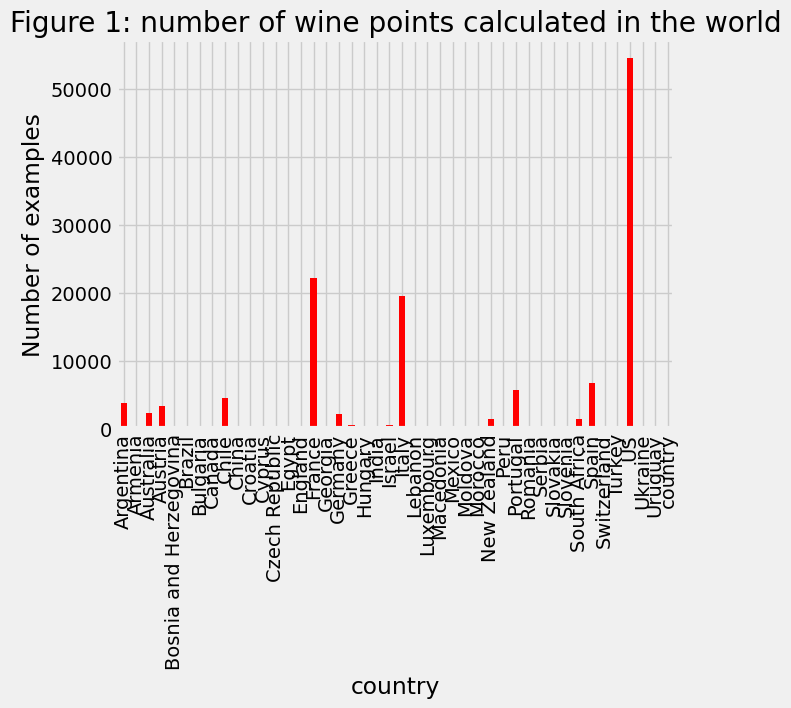

In [63]:
wine=df.groupby('country').size()
plt.xlabel("points")
plt.ylabel("Total numbers")
plt.title('Figure 1: number of wine points calculated in the world')
wine.plot(kind='bar',color='r')
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 129972 entries, nan to 129970.0
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   country                129909 non-null  object
 1   description            129972 non-null  object
 2   designation            92507 non-null   object
 3   points                 129972 non-null  object
 4   price                  120976 non-null  object
 5   province               129909 non-null  object
 6   region_1               108725 non-null  object
 7   region_2               50512 non-null   object
 8   taster_name            103728 non-null  object
 9   taster_twitter_handle  98759 non-null   object
 10  title                  129972 non-null  object
 11  variety                129971 non-null  object
 12  winery                 129972 non-null  object
dtypes: object(13)
memory usage: 17.9+ MB


In [74]:
df['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Žilavka                         1
Pinotage-Merlot                 1
Maria Gomes-Bical               1
Syrah-Grenache-Viognier         1
Bobal-Cabernet Sauvignon        1
Name: variety, Length: 708, dtype: int64

In [76]:
df['country'].value_counts()


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [83]:
df = df[['price','province',]]
df.head(10)

,price,province
NaN,price,province
0.0,NaN,Sicily & Sardinia
1.0,15.0,Douro
2.0,14.0,Oregon
3.0,13.0,Michigan
4.0,65.0,Oregon
5.0,15.0,Northern Spain
6.0,16.0,Sicily & Sardinia
7.0,24.0,Alsace
8.0,12.0,Rheinhessen
